# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset 

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

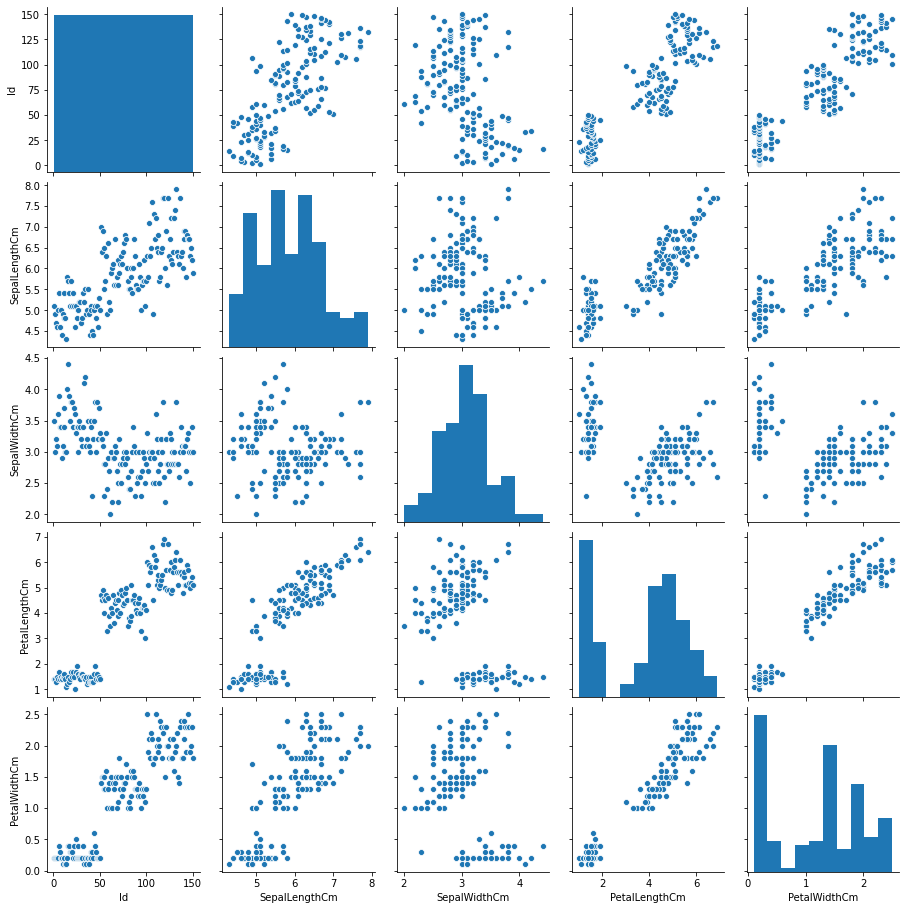

In [4]:
sns.pairplot(iris)

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = iris.drop('Species',axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [7]:
predictions = d_tree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

In [8]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [9]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 14  1]
 [ 0  0 14]]


# Decision Tree Visualization

In [10]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [11]:
features = list(iris.columns[1:])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

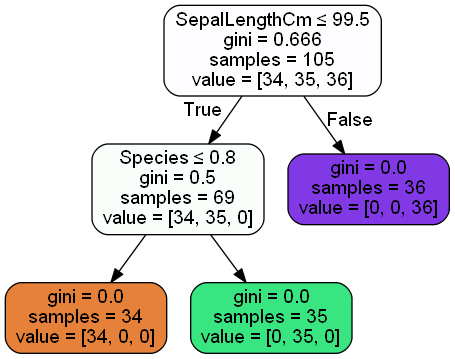

In [12]:
dot_data = StringIO()  
export_graphviz(d_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  